# Comparing Alternate System Configurations

In [1]:
import math
import numpy as np
import scipy.stats as stats 
import seaborn as sns
import matplotlib.pyplot as plt

## Simulation: Project Completion

In [2]:
# Project Evaluation example in class

def SimulateOneRun(a,b):
    # Generate activity times that are Unif(a,b)
    U = np.random.uniform(0,1,13) # Generate 13 samples of Unif(0,1)
    Y = a + (b-a)*U # inverse transform method (or just observation)

    # Compute activity times incurred in each path
    # Each path must be completed for project to be completed
    P1 = Y[1] + Y[5] + Y[10]
    P2 = Y[0] + Y[2] + Y[5] + Y[10]
    P3 = Y[0] + Y[4] + Y[10]
    P4 = Y[0] + Y[3] + Y[7] + Y[9] + Y[10]
    P5 = Y[0] + Y[3] + Y[7] + Y[8] + Y[12]
    P6 = Y[0] + Y[3] + Y[6] + Y[11] + Y[12]

    # Return total project time incurred
    # - duration of the longest path
    T = max(P1,P2,P3,P4,P5,P6)
    
    return T

## Comparing two systems

In [15]:
# Output analysis (without CRN)
n_samples = 100
# Type 1: faster, less reliable workers
X1 = np.array([SimulateOneRun(20,70) for i in range (n_samples)])
# Type 2: slower, more reliable workers
X2 = np.array([SimulateOneRun(32,60) for i in range (n_samples)])

# Take difference and compute mean
# positive number suggests Type 2 results in faster project completion on average
# negative number suggests Type 1 results in faster project completion on average
Z = X1-X2
np.mean(Z)

np.float64(0.362938517760405)

In [16]:
# Take difference and compute mean
# positive number suggests Type 2 results in faster project completion on average
# negative number suggests Type 1 results in faster project completion on average
Z = X1-X2
np.mean(Z)

np.float64(0.362938517760405)

In [21]:
# define paired-t test
def custom_t_test(Z, desired_accuracy):
    # desired_accuracy here is the confidence level
    # ie we would reject the null hypothesis if we observe a result outside the corresponding confidence interval
    # note: significance level = 1 - confidence level, the allowed probability that we reject the nmull hypothesis when it is in fact true
    n_samples = len(Z)
    # compute t-statistic (how many standard deviations off from the mean 0)
    # note: mean 0 because the null hypothesis is that the two populations have the same mean
    # the smaller the t-statistic, the more probable that we would see such a result under the null hypothesis
    # the larger the t-statistic, the less probable that we would see such a result under the null hypothesis
    t_statistic = np.mean(Z)/math.sqrt(np.var(Z,ddof=1)/n_samples)
    # compute p-value: the probability of observing a difference of at least what we observed if null hypothesis is true
    # a small p-value means unlikely to observe what we observed if null hypothesis true
    # so more likely to reject null hypothesis
    p_value = 2 * (1 - stats.t.cdf(t_statistic,df=n_samples-1))
    # compute confidence interval
    sample_mean = np.mean(Z)
    se = math.sqrt(np.var(Z,ddof=1)/n_samples)
    t_score = stats.t.ppf(1 - (1-desired_accuracy)/2, df=n_samples-1)
    CI_lower = sample_mean - t_score * se
    CI_upper = sample_mean + t_score * se
    print('t-statistic = {}'.format(t_statistic))
    print('p-value = {}'.format(p_value))
    print('confidence interval = ({},{})'.format(CI_lower,CI_upper))
    if CI_lower > 0 or CI_upper < 0:
        # this holds if and only if confidence interval does not contain 0
        print('At {:.0%} confidence level, there is a statistically significant difference in the two systems.'.format(desired_accuracy))
    else:
        # this holds if and only if confidence interval contains 0
        print('At {:.0%} confidence level, there is no statistically significant difference in the two systems.'.format(desired_accuracy))
    

In [23]:
# run test
custom_t_test(Z, 0.95)

t-statistic = 0.11455026782456189
p-value = 0.9090336032061892
confidence interval = (-5.923810286690808,6.6496873222116175)
At 95% confidence level, there is no statistically significant difference in the two systems.


In [24]:
# scipy also provides built-in functions to run the t-test
# verify that we get the same results:
print(stats.ttest_rel(X1,X2))
print(stats.ttest_1samp(Z, popmean=0).confidence_interval(confidence_level=0.95))

TtestResult(statistic=np.float64(0.11455026782456189), pvalue=np.float64(0.9090336032061892), df=np.int64(99))
ConfidenceInterval(low=np.float64(-5.923810286690808), high=np.float64(6.6496873222116175))


## Reference code for common random numbers example

In [25]:
# Time taken to park a car example
print(stats.ttest_1samp([-20,10,-35,10,-10], popmean=0).confidence_interval(confidence_level=0.9))
print(stats.ttest_1samp([-10,-15,0,-15,-5], popmean=0).confidence_interval(confidence_level=0.9))

ConfidenceInterval(low=np.float64(-27.58500940941963), high=np.float64(9.585009409419623))
ConfidenceInterval(low=np.float64(-15.215348029125622), high=np.float64(-2.78465197087438))


## Comparing two systems using common random numbers

In [32]:
# Output analysis (with CRN)
n_samples = 100
common_seed = 2024 # use same seed to use the same random draws
# fill in here: the code to use the same seed for both systems is missing
np.random.seed(common_seed) # set seed for 1st run
# Type 1: faster, less reliable workers
X1_crn = np.array([SimulateOneRun(20,70) for i in range (n_samples)])
# Type 2: slower, more reliable workers
np.random.seed(common_seed) # set seed for 2nd run
X2_crn = np.array([SimulateOneRun(32,60) for i in range (n_samples)])

In [33]:
# Take difference and compute mean
# positive number suggests Type 2 results in faster project completion on average
# negative number suggests Type 1 results in faster project completion on average
Z_crn = X1_crn-X2_crn
np.mean(Z_crn)

np.float64(4.244249068447212)

In [34]:
# run test
custom_t_test(Z_crn, 0.95)

t-statistic = 3.456116022156568
p-value = 0.0008087456576135743
confidence interval = (1.8075510831802162,6.680947053714208)
At 95% confidence level, there is a statistically significant difference in the two systems.


In [29]:
# scipy also provides built-in functions to run the t-test
# verify that we get the same results:
print(stats.ttest_rel(X1_crn,X2_crn))
print(stats.ttest_1samp(Z_crn, popmean=0).confidence_interval(confidence_level=0.95))

TtestResult(statistic=np.float64(1.1817793413123074), pvalue=np.float64(0.24012418135443608), df=np.int64(99))
ConfidenceInterval(low=np.float64(-2.417643262186896), high=np.float64(9.538747322142818))


## Examine correlation

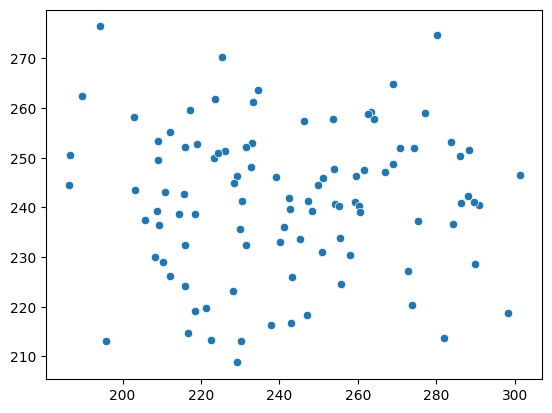

In [30]:
# Plot correlation between X1,X2 without CRN
sns.scatterplot(x=X1,y=X2)
plt.show()

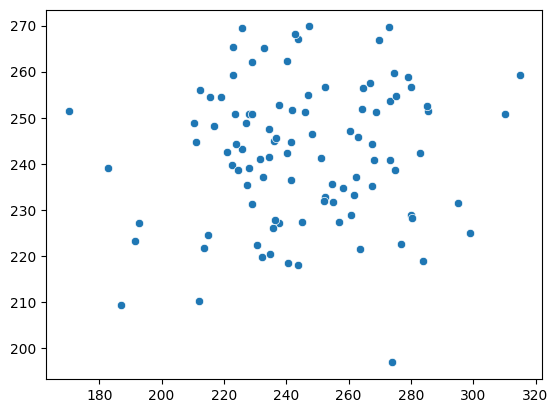

In [31]:
# Plot correlation between X1,X2 with CRN
sns.scatterplot(x=X1_crn,y=X2_crn)
plt.show()